# What is distribution and why are they important in statistics?

![](https://drive.google.com/uc?id=1J8S0HuXlhjnciRF1tcdT90q3U1obow3D)

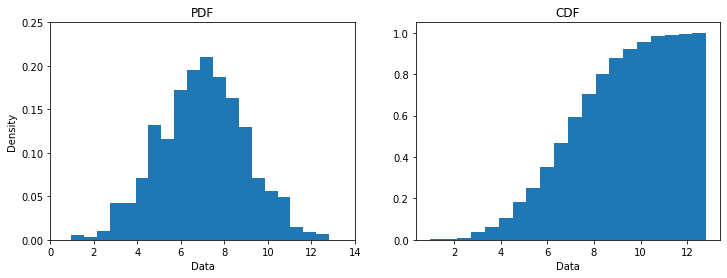

In [ ]:
# Normal distribution

# Import the modules
import matplotlib.pyplot as plt
from scipy.stats import norm

# Figure setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Declare a normal distributed sample
dist = norm.rvs(loc=7, scale=2, size=1000, random_state=43)
# Histogram view w/ density
axes[0].hist(x=dist, bins=20, density=True)
# Histogram view w/ cumulative
axes[1].hist(x=dist, bins=20, density=True, cumulative=True)
# X-lim
axes[0].set_xlim(xmin=0., xmax=14.) # Left side
# Y-lim
axes[0].set_ylim(ymin=0., ymax=.25) # Left side
# Y label
axes[0].set_ylabel(ylabel="Density") # Left side
# X labels
axes[0].set_xlabel(xlabel="Data")
axes[1].set_xlabel(xlabel="Data")
# Titles
axes[0].set_title(label="PDF")
axes[1].set_title(label="CDF")

# Show the plot
plt.show()

In [ ]:
# PPF vs CDF
print(norm.ppf(0.95), norm.cdf(1.6448536269514722))

1.6448536269514722 0.95


# Z-score Table

![](https://drive.google.com/uc?id=1uNux9B0tZgBycU5fQ6TpZEpomSizYZj0)

Source: https://www.z-table.com/

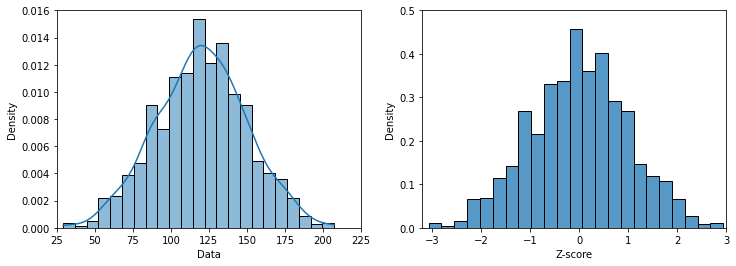

In [ ]:
# Import the modules
from scipy.stats import zscore
from seaborn import histplot

# Randomly generate a data with mean 85 +/- 50
rand_data = norm.rvs(loc=120, scale=30, size=1000, random_state=43)

# Visualize the original and the zcore as histograms
# Figure setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
# Histogram of the original data
histplot(x=rand_data, kde=True, stat="density", ax=axes[0])
# X and y lims
axes[0].set_xlim(xmin=25., xmax=225.)
axes[0].set_ylim(ymin=0., ymax=0.016)
# X label
axes[0].set_xlabel(xlabel="Data")
# Histogram of the zcores
histplot(zscore(rand_data), stat="density", ax=axes[1])
# X and y lims
axes[1].set_xlim(xmin=-3.2, xmax=3.)
axes[1].set_ylim(ymin=0., ymax=0.5)
# X label
axes[1].set_xlabel(xlabel="Z-score")

# Show the plot
plt.show()

# Confidence Interval

![](https://drive.google.com/uc?id=1eqc1-psJyYM6V37UBIWKeQI1qFppyAro)

Source: https://tr.wikipedia.org/wiki/Hata_pay%C4%B1

# Real data example

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Copy the dataset to "/content/" path
!cp /content/gdrive/MyDrive/YouTube/dataAnalysisPlaylist/practical-statistics-for-data-scientists/heart.csv /content/heart.csv

# Unmount the gdrive
drive.flush_and_unmount()

In [ ]:
# Import the modules
import pandas as pd

# Read the data
# Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
data = pd.read_csv("/content/heart.csv"); data.sample(n=5, random_state=43)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
547,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
109,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
138,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1
734,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [ ]:
# Transposed describe
data.describe()\
    .T\
    .drop(columns=["count"])\
    .sort_values(by="std", ascending=False)

,mean,std,min,25%,50%,75%,max
chol,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
trestbps,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
age,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
oldpeak,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
ca,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0
cp,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
thal,2.323902,0.620660,0.0,2.0,2.0,3.0,3.0
slope,1.385366,0.617755,0.0,1.0,1.0,2.0,2.0
restecg,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0


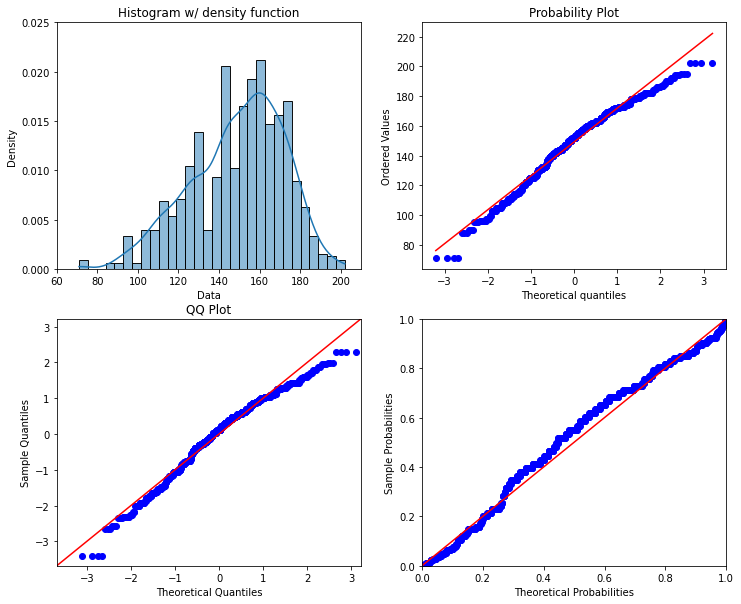

In [ ]:
# Import the modules
from scipy.stats import probplot
from statsmodels.api import ProbPlot

# Take "maximum heart rate achieved" values
max_hr = data.thalach.values
# Declare a Probability Plot object
pplot = ProbPlot(data=max_hr, dist=norm, fit=True)

# Figure setup
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
# Histogram of the original data
histplot(x=max_hr, kde=True, stat="density", bins=30, ax=axes[0][0])
# X and y lims
axes[0][0].set_xlim(xmin=60., xmax=210.)
axes[0][0].set_ylim(ymin=0., ymax=0.025)
# X label
axes[0][0].set_xlabel(xlabel="Data")
# Title
axes[0][0].set_title(label="Histogram w/ density function")
# Probability plot
probplot(x=max_hr, plot=axes[0][1])
# QQ plot
pplot.qqplot(line="45", ax=axes[1][0])
# Title
axes[1][0].set_title(label="QQ Plot")
# PP plot
pplot.ppplot(line="45", ax=axes[1][1])
# Title
axes[1][1].set_title(label="PP Plot")

# Show the plots
plt.show()

In [ ]:
# Delete not needed objects
del data

# Central Limit Theorem

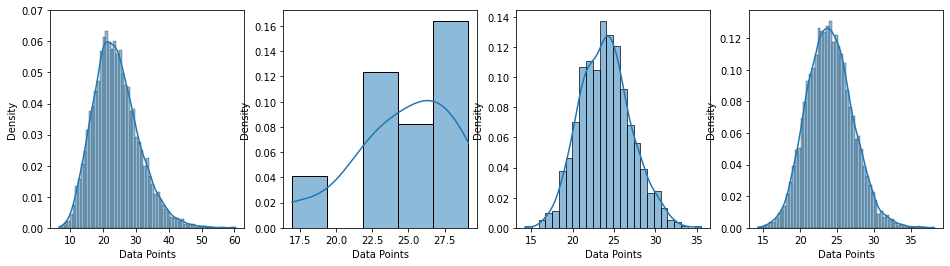

In [ ]:
# Import the modules
from numpy import mean
from scipy.stats import chi2

# Declare sample size
sizes = [10, 1000, 10000]
# 10K Chi-square sample
r = chi2.rvs(24, size=10000, random_state=43)
# Figure setup
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
# Histogram of the original sample
histplot(x=r, stat="density", kde=True, ax=axes[0])
# X label
axes[0].set_xlabel(xlabel="Data Points")
# Y lim
axes[0].set_ylim(ymin=0., ymax=0.07)

for (ax, size) in zip(axes[1:], sizes):
    # Sample 1 at a time for "size" times
    r = [mean(chi2.rvs(24, size=5)) for _ in range(size)]
    # Histogram
    histplot(x=r, stat="density", kde=True, ax=ax)
    # X label
    ax.set_xlabel(xlabel="Data Points")

# Plot
plt.show()

# Kolmogorov-Smirnov Goodness-of-Fit Tests

In [ ]:
from scipy.stats import binom, expon, kstest

# Declare a normally distributed sample
r = norm.rvs(size=1000, random_state=43)
# Hypothesis result dict
d = {
    True: "Reject",
    False: "Cannot Reject"
}

# Kolmogorov-Smirnov Goodness-of-Fit Tests
res = kstest(rvs=r, cdf=norm.cdf) # Gaussian
# Trace
print("Gaussian:", round(res.pvalue, 5), d[res.pvalue < 0.05])
res = kstest(rvs=r, cdf=binom(n=5, p=0.4).cdf) # Binom
# Trace
print("Binom:", round(res.pvalue, 5), d[res.pvalue < 0.05])
res = kstest(rvs=r, cdf=expon.cdf) # Exponential
# Trace
print("Exponential:", round(res.pvalue, 5), d[res.pvalue < 0.05])
res = kstest(rvs=r, cdf=chi2(df=78).cdf) # Chi-square
# Trace
print("Chi-square [df=78]:", round(res.pvalue, 5), d[res.pvalue < 0.05])

Gaussian: 0.8316 Cannot Reject
Binom: 0.0 Reject
Exponential: 0.0 Reject
Chi-square [df=78]: 0.0 Reject


In [ ]:
# Kolmogorov-Smirnov Goodness-of-Fit Test on heart rate data
res = kstest(rvs=max_hr, cdf=norm.cdf) # Gaussian
# Trace
print("Gaussian:", round(res.pvalue, 5), d[res.pvalue < 0.05])

Gaussian: 0.0 Reject


In [ ]:
import numpy as np
from scipy.stats import kstest

from typing import List


def fit_distribution(data: np.ndarray, distributions: List[str]) -> tuple:
    """
    Applies the Kolmogorov-Smirnov Goodness-of-Fit Test to the given data
    to find out which kind of distribution the data relates to.

    Parameters:
    data (numpy.ndarray): 1D array containing the data.
    distributions (list of str): A list of strings that specify the distributions to test against. 
        Must be a list of scipy.stats supported distributions.

    Returns:
    tuple: A tuple containing the best fitting distribution and its p-value.
    """
    # Declare trackers
    best_fit = None # for the best fit
    best_p = None # for the best p-value
    # Iterate through the given distribution list
    for dist in distributions:
        # Apply the Kolmogorov-Smirnov Goodness-of-Fit Test
        D, p = kstest(data, dist)
        # If a better p-value is acquired
        if best_p is None or p > best_p:
            # Update trackers
            best_fit = dist # the best fit
            best_p = p # the best p-value
    # Return the results
    return (best_fit, best_p)


# Apply the Kolmogorov-Smirnov Goodness-of-Fit Test
# to the maximum heart rate feature

# Example list of distributions to test against
dists = ["norm", "uniform", "expon"]
# Results
best_fit, p = fit_distribution(data=expon.rvs(size=10000), distributions=dists)
# Trace the results
print(f"Best fit: {best_fit}, p-value: {p:.4f}, {d[p < 0.05]}")

Best fit: expon, p-value: 0.8796, Cannot Reject


# Most known distribution types for statistical tests

- Normal ~ Long-Tailed ~ Student's T
- Binomial ~ Bernoulli
- Chi-square ~ F
- Poisson ~ Exponential ~ Weibull